In [1]:
import os
os.chdir('../')
os.listdir()


['results',
 'notebooks',
 'README.txt',
 'compare_ortholog_results.py',
 'prodigal_pipeline.sh',
 'genemark2s_pipeline.sh',
 'orthologs_pipeline.sh',
 'compare_prodigal_results.py',
 'compare_genemark2s_results.py',
 'data',
 'get_fasta_file.sh']

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [7]:
folders = [f'{d}' for d in os.listdir('data/output/genemark') if not 'four_or_two' in d]
# folders
prefix = 'data/output/genemark/'
print(os.listdir())
time = []
for folder in folders:
    file = f'{prefix}{folder}/{folder}.strace.txt'
    try:
        # print(fi)
        with open(file) as f:
            # print(f'YAY {file}')
            rows = csv.reader(f)
            for row in rows:
                # print(row)
                # print('total' in row)
                # # print(type(row))
                if 'total' in row[0]:
                    # print(row)
                    row = row[0].split(' ')
                    # print(row[4])
                    time.append(float(row[4]))
                # print(row)
    except Exception as e:
        print(e, file)


['results', 'notebooks', 'README.txt', 'compare_ortholog_results.py', 'prodigal_pipeline.sh', 'genemark2s_pipeline.sh', 'orthologs_pipeline.sh', 'compare_prodigal_results.py', 'compare_genemark2s_results.py', 'data', 'get_fasta_file.sh']


In [8]:
# folders = [f'{prefix}{d}' for d in os.listdir('data/output/prodigal')]
# print(time)

arr = np.array(time)


In [9]:
arr.mean()
# print(arr)

0.18847210791366906

Text(0.3, 15, '$\\mu=0.004879$ seconds')

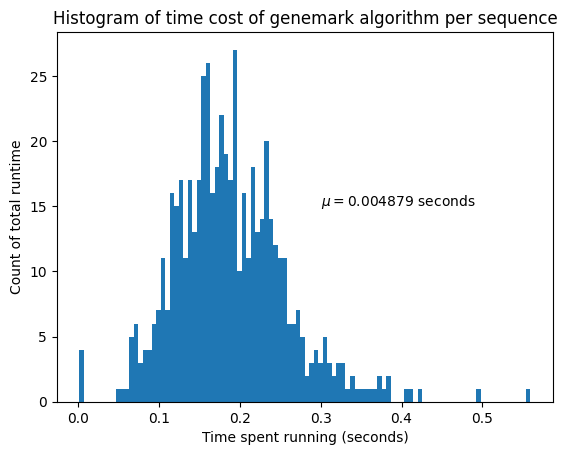

In [14]:
# for folder in folders:
#     print(folder)
#     # if folder != 'N':
#     print(os.listdir(folder))
#     with open(folder+'.strace.txt') as f:
#         reader = csv.reader(f)
#         for row in reader:
#             print(row)

plt.hist(arr, bins=100)
plt.xlabel('Time spent running (seconds)')
plt.ylabel('Count of total runtime')
plt.title('Histogram of time cost of genemark algorithm per sequence')
# plt.text(0.7, 150, f')

plt.text(0.3, 15, r'$\mu=0.004879$ seconds')
